# Analysis of Mitre Attack data

### Questions to ask

* Which groups are specialised and which use a wide range of techniques

* What are the more frequently used Techniques across all Groups

* What are the more frequenty used Mitigations across all Groups



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyattck import Attck

attack = Attck()
attack.update(enterprise=True)

### Group vs Technique Analysis
Build a cross reference dataframe of Groups and Techniques

In [2]:
t = []
for technique in attack.enterprise.techniques:
    t.append(technique.name)
    
print("Total number of techniques = " + str(len(t)))

Total number of techniques = 266


In [3]:
groups = []
techniques1 = []

for technique in attack.enterprise.techniques:
    for actor in technique.actors:
        techniques1.append(technique.name)
        groups.append(actor.name)

data2 = {
    'techniques': techniques1,
    'groups': groups
}

t2g = pd.DataFrame(data2, columns=['techniques', 'groups'])


In [4]:
t2g.head(n=10)

,techniques,groups
0,Access Token Manipulation,Lazarus Group
1,Access Token Manipulation,APT28
2,Access Token Manipulation,Turla
3,Accessibility Features,APT3
4,Accessibility Features,APT29
5,Accessibility Features,Deep Panda
6,Accessibility Features,Axiom
7,Accessibility Features,APT41
8,Account Discovery,APT3
9,Account Discovery,FIN6


In [5]:
td = list(set(t) - set(techniques1))
print(str(len(td)) + " Techniques are not used by Groups")

95 Techniques are not used by Groups


#### Group Frequency

What is the frequency of each group in using the list of techniques? This will tell us if the group uses a wide range of techniques or is very specialised in which techniques they use.

In [6]:
groupFrequency = t2g['groups'].value_counts()

#with pd.option_context('display.max_rows', 10):
#    display(groupFrequency)
    
groupFrequency.head(n=20)


Lazarus Group        55
APT32                55
APT28                53
OilRig               44
APT3                 44
Threat Group-3390    42
APT41                41
Dragonfly 2.0        41
Turla                38
Patchwork            34
menuPass             32
MuddyWater           31
BRONZE BUTLER        31
Cobalt Group         29
Soft Cell            28
APT37                27
Magic Hound          27
Ke3chang             27
FIN8                 25
Leviathan            25
Name: groups, dtype: int64

<BarContainer object of 84 artists>

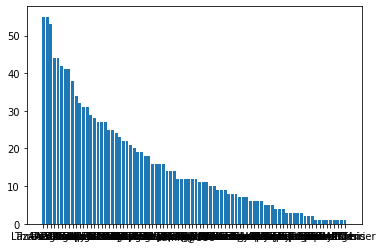

In [52]:
plt.bar(groupFrequency.index, groupFrequency.values)

#### Technique Frequency

What is the frequency of each technique used by groups. This will tell us how popular a technique is used by Groups.

In [7]:
techniqueFrequency = t2g['techniques'].value_counts()

#with pd.option_context('display.max_rows', 10):
#    display(techniqueFrequency)

techniqueFrequency.head(n=20)
#techniqueFrequency

Scripting                                 41
Spearphishing Attachment                  37
User Execution                            37
PowerShell                                36
Obfuscated Files or Information           36
Credential Dumping                        36
Command-Line Interface                    32
Registry Run Keys / Startup Folder        30
Standard Application Layer Protocol       30
Remote File Copy                          30
File Deletion                             25
Valid Accounts                            25
Scheduled Task                            24
Data Compressed                           22
System Network Configuration Discovery    20
Spearphishing Link                        20
System Information Discovery              20
File and Directory Discovery              19
Commonly Used Port                        19
Masquerading                              19
Name: techniques, dtype: int64

<BarContainer object of 171 artists>

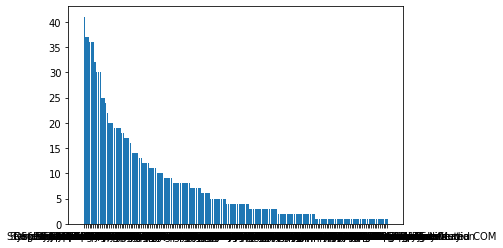

In [54]:
plt.bar(techniqueFrequency.index, techniqueFrequency.values)

### Mitigation vs Techniques Analysis

Build a dataframe cross reference of Mitigations and Techniques

In [8]:
mitigations = []
techniques2 = []

for mitigation in attack.enterprise.mitigations:
        for technique in mitigation.techniques:
            mitigations.append(mitigation.name)
            techniques2.append(technique.name)
            
data = {'mitigations': mitigations, 'techniques': techniques2}

m2t = pd.DataFrame(data, columns=['mitigations', 'techniques'])

In [9]:
m2t.head(10)

,mitigations,techniques
0,.bash_profile and .bashrc Mitigation,.bash_profile and .bashrc
1,Access Token Manipulation Mitigation,Access Token Manipulation
2,Accessibility Features Mitigation,Accessibility Features
3,Account Discovery Mitigation,Account Discovery
4,Account Manipulation Mitigation,Account Manipulation
5,Account Use Policies,Brute Force
6,Active Directory Configuration,Credentials in Files
7,Active Directory Configuration,SID-History Injection
8,Active Directory Configuration,Credential Dumping
9,Active Directory Configuration,Pass the Ticket


#### Mitigation Frequency

What is the frequency of each Mitigation when applied to Techniques

In [10]:
mitigationFrequency = m2t['mitigations'].value_counts()
mitigationFrequency[0:20]

#with pd.option_context('display.max_rows', None):
#    display(mitigationFrequency)

Privileged Account Management              37
User Account Management                    37
Execution Prevention                       32
Restrict File and Directory Permissions    29
Network Intrusion Prevention               28
Disable or Remove Feature or Program       24
Audit                                      23
Network Segmentation                       22
Operating System Configuration             18
Update Software                            17
Password Policies                          17
User Training                              17
Filter Network Traffic                     15
Multi-factor Authentication                13
Code Signing                               10
Restrict Web-Based Content                 10
Application Isolation and Sandboxing       10
Encrypt Sensitive Information              10
Exploit Protection                         10
Software Configuration                      8
Name: mitigations, dtype: int64

<BarContainer object of 282 artists>

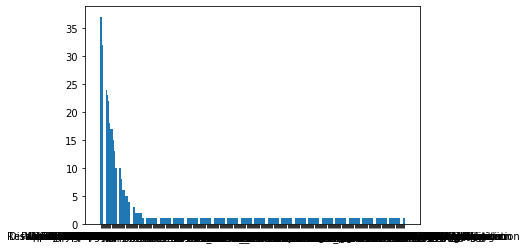

In [87]:
plt.bar(mitigationFrequency.index, mitigationFrequency.values)

### Group vs Technique vs Mitigation

Join the two data frames of group/technique and mitigation/technique by techniques. This will allow us to determine the relationship between Groups and Mitigations. For example a Group will use a set of Technique(s) and each Technique will use a set of Mitigation(s).


In [11]:
m2t2a = m2t.set_index('techniques').join(t2g.set_index('techniques'))

# remove the rows that are null
mta = m2t2a[m2t2a['groups'].notna()]
mta

,mitigations,groups
techniques,,
Access Token Manipulation,Access Token Manipulation Mitigation,Lazarus Group
Access Token Manipulation,Access Token Manipulation Mitigation,APT28
Access Token Manipulation,Access Token Manipulation Mitigation,Turla
Access Token Manipulation,Privileged Account Management,Lazarus Group
Access Token Manipulation,Privileged Account Management,APT28
...,...,...
Winlogon Helper DLL,User Account Management,Tropic Trooper
Winlogon Helper DLL,Winlogon Helper DLL Mitigation,Turla
Winlogon Helper DLL,Winlogon Helper DLL Mitigation,Tropic Trooper


#### Mitigation Frequency

What is the frequency of Mitigations that apply to all Techniques that are used by all Groups. This gives an indication of the importance of that mitigation in the context of all Groups. 

In [12]:
mF = mta['mitigations'].value_counts()
mF[0:20]

Network Intrusion Prevention               282
Privileged Account Management              235
User Training                              152
Disable or Remove Feature or Program       142
User Account Management                    140
Execution Prevention                       136
Restrict Web-Based Content                 132
Audit                                      110
Operating System Configuration             105
Password Policies                          102
Network Segmentation                       100
Application Isolation and Sandboxing        96
Antivirus/Antimalware                       92
Multi-factor Authentication                 87
Restrict File and Directory Permissions     67
Exploit Protection                          61
Update Software                             58
Code Signing                                57
Active Directory Configuration              48
Filter Network Traffic                      48
Name: mitigations, dtype: int64

In [15]:
#with pd.option_context('display.max_rows', None):
#    display(mF)

<BarContainer object of 205 artists>

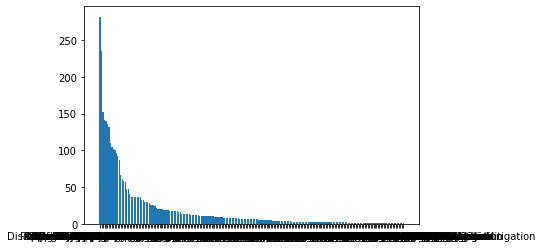

In [96]:
plt.bar(mF.index, mF.values)

In [102]:
mFreqDF = pd.DataFrame({'mitigation': mF.index, 'frequency': mF.values})